In [ ]:
from google.colab import drive



drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import pandas as pd
# Load data
melb_data = pd.read_csv('gdrive/MyDrive/bacasestudy/melb_data.csv')

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

melb_target = melb_data.Price
melb_predictors = melb_data.drop(['Price'], axis=1)


# For the sake of keeping the example simple, we'll use only numeric predictors.
melb_numeric_predictors = melb_predictors.select_dtypes(exclude=['object'])

X_train, X_test, y_train, y_test = train_test_split(melb_predictors, melb_target, test_size = 0.4,random_state=42)

Get Model Score from Dropping Columns with Missing Values¶


In [ ]:
cols_with_missing = [col for col in X_train.columns
                                 if X_train[col].isnull().any()]
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_test  = X_test.drop(cols_with_missing, axis=1)


Mean Absolute Error from dropping columns with Missing Values:


Get Model Score from Imputation

In [ ]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer( strategy='constant', fill_value="kerala govt")
imputed_X_train = my_imputer.fit_transform(X_train)
imputed_X_test = my_imputer.transform(X_test)


Mean Absolute Error from Imputation:


Get Score from Imputation with Extra Columns Showing What Was Imputed¶


In [ ]:
imputed_X_train_plus = X_train.copy()
imputed_X_test_plus = X_test.copy()

cols_with_missing = (col for col in X_train.columns
                                 if X_train[col].isnull().any())
for col in cols_with_missing:
    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
    imputed_X_test_plus[col + '_was_missing'] = imputed_X_test_plus[col].isnull()

from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer( strategy='constant', fill_value="kerala govt")
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_test_plus = my_imputer.transform(imputed_X_test_plus)



Correlation analysis

In [ ]:
melb_data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


Data scaling transformation

Before transformation

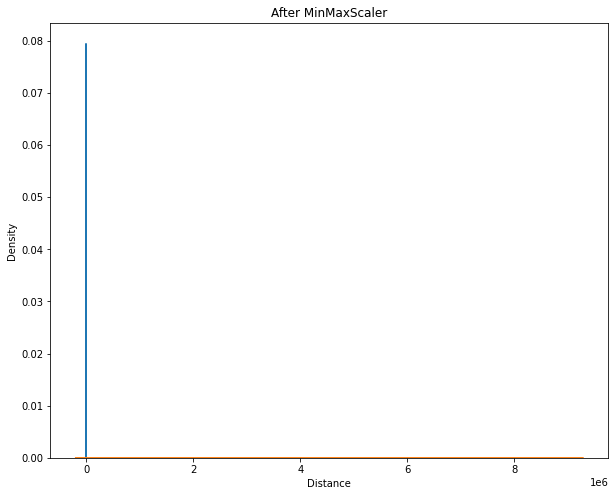

In [ ]:
df_mm = melb_data[['Distance','Price']]
col_names=['Distance','Price']
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['Distance'], ax=ax1)
sns.kdeplot(df_mm['Price'], ax=ax1)


After transformation

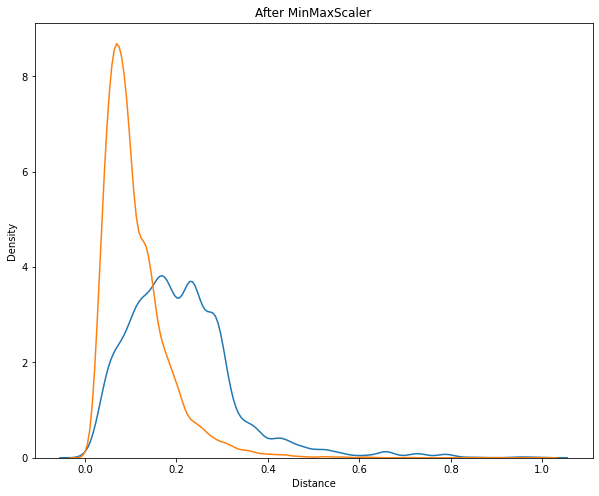

In [ ]:
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(melb_data[['Distance','Price']])
col_names=['Distance','Price']
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_mm['Distance'], ax=ax1)
sns.kdeplot(df_mm['Price'], ax=ax1)


1. Hold-out (data)
Rather than using all of our data for training, we can simply split our dataset into two sets: training and testing. A common split ratio is 80% for training and 20% for testing. We train our model until it performs well not only on the training set but also for the testing set. This indicates good generalization capability since the testing set represents unseen data that were not used for training. However, this approach would require a sufficiently large dataset to train on even after splitting.
2. Cross-validation (data)
We can split our dataset into k groups (k-fold cross-validation). We let one of the groups to be the testing set (please see hold-out explanation) and the others as the training set, and repeat this process until each individual group has been used as the testing set (e.g., k repeats). Unlike hold-out, cross-validation allows all data to be eventually used for training but is also more computationally expensive than hold-out.

3. Data augmentation (data)
A larger dataset would reduce overfitting. If we cannot gather more data and are constrained to the data we have in our current dataset, we can apply data augmentation to artificially increase the size of our dataset. For example, if we are training for an image classification task, we can perform various image transformations to our image dataset (e.g., flipping, rotating, rescaling, shifting).

4. Feature selection (data)
If we have only a limited amount of training samples, each with a large number of features, we should only select the most important features for training so that our model doesn’t need to learn for so many features and eventually overfit. We can simply test out different features, train individual models for these features, and evaluate generalization capabilities, or use one of the various widely used feature selection methods.

5. L1 / L2 regularization (learning algorithm)
Regularization is a technique to constrain our network from learning a model that is too complex, which may therefore overfit. In L1 or L2 regularization, we can add a penalty term on the cost function to push the estimated coefficients towards zero (and not take more extreme values). L2 regularization allows weights to decay towards zero but not to zero, while L1 regularization allows weights to decay to zero.

6. Remove layers / number of units per layer (model)
As mentioned in L1 or L2 regularization, an over-complex model may more likely overfit. Therefore, we can directly reduce the model’s complexity by removing layers and reduce the size of our model. We may further reduce complexity by decreasing the number of neurons in the fully-connected layers. We should have a model with a complexity that sufficiently balances between underfitting and overfitting for our task.

7. Dropout (model)
By applying dropout, which is a form of regularization, to our layers, we ignore a subset of units of our network with a set probability. Using dropout, we can reduce interdependent learning among units, which may have led to overfitting. However, with dropout, we would need more epochs for our model to converge.

8. Early stopping (model)
We can first train our model for an arbitrarily large number of epochs and plot the validation loss graph (e.g., using hold-out). Once the validation loss begins to degrade (e.g., stops decreasing but rather begins increasing), we stop the training and save the current model. We can implement this either by monitoring the loss graph or set an early stopping trigger. The saved model would be the optimal model for generalization among different training epoch values.

You have reached the end of the article! Hopefully, you now have a toolbox of methods to battle overfitting ⚔️.

